# **Task 2 - To Explore Supervised Machine Learning**
In this regression task, we will predict the percentage of marks that a student is expected to score based upon the
number of hours they studied. This is a simple linear regression task as it involves just two variables.

## 1. Importing all the libraries required for this task

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

## 2. Downloading the dataset and exploring it

In [2]:
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Dataset downloaded.")

data.head(10)

Dataset downloaded.


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**Understanding the dataset**

The dataset contains two columns, named Hours and Scores. Hours column contains number of hours a student spent on studying, while Scores column contains the percentage of marks obtained by the student for studying for those specific hours.

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## 3. Visualizing the dataset

We will plot our data points on a 2D graph to see if we can manually find any relationship between the data. 

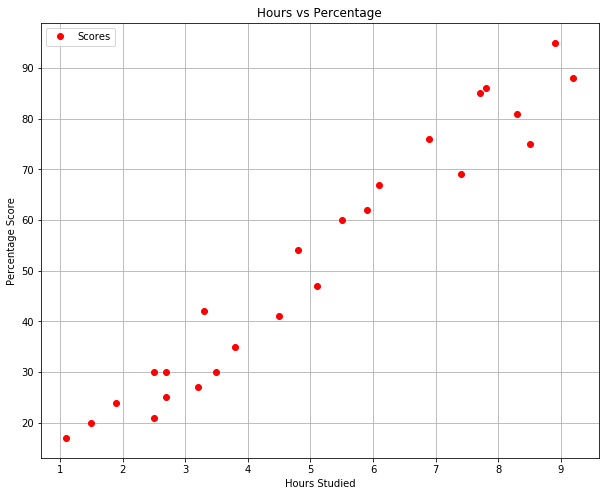

In [4]:
# Plotting the distribution of scores
data.plot(x = 'Hours', y = 'Scores', style = 'o', c = 'red', figsize = (10,8))
plt.title('Hours vs Percentage') 
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

## 4. Preparing the data

The next step is to divide the dataset into independent variable (Hours) and dependent variable (Scores).

In [5]:
X = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values  

The next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [6]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0) 

## 5. Training the Model
Since the dataset and has only 2 variables, we will use Simple Linear Regression to train our model. 

In [7]:
# Fitting Simple Linear Regresstion to the Training set
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

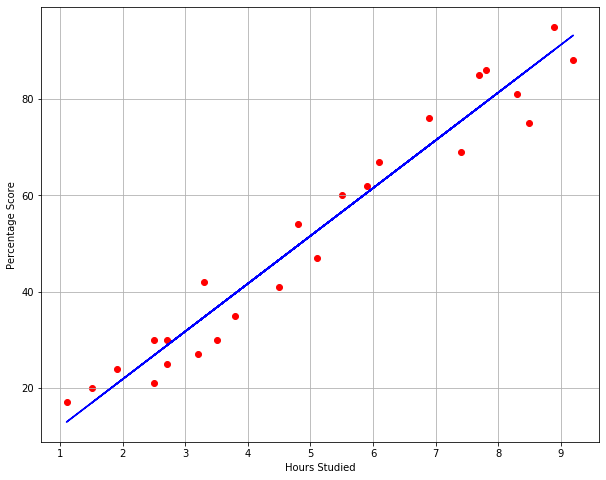

In [8]:
# Plotting the regression line
line = (regressor.coef_ * X) + regressor.intercept_

# Plotting for the test data
plt.figure(figsize=(10,8))
plt.scatter(X, y, color = 'red')
plt.plot(X, line, color = 'blue');
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

## 6. Making Predictions
Now that we have trained our model, it's time to make some predictions.

In [9]:
# Testing data (in Hours)
print("The training test set: ") 
print(X_test) 

# Predicting the scores
y_pred = regressor.predict(X_test)

The training test set: 
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [10]:
# Comparing Actual vs Predicted value of the score
df = pd.DataFrame({'Actual Score': y_test, 'Predicted Score': y_pred})  
df

,Actual Score,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


**Now let's see what will be the predicted score if a student study for 9.25 hrs in a day.**

In [11]:
hours = 9.25
prediction = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("The  predicted Score of the student = {} %".format(round(prediction[0], 2)))  # Rounding the predicted score upto 2 decimal places

No of Hours = 9.25
The  predicted Score of the student = 93.69 %


## 7. Evaluating the model

The final step is to evaluate the performance of the model. This step is particularly important to compare how well different models perform on a particular dataset.

In [12]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred)) 
print('Root Mean Absolute Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R2 Score::', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Absolute Error: 4.6474476121003665
R2 Score:: 0.9454906892105356
